In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist

%config InlineBackend.figure_format='svg'
%matplotlib inline
plt.style.use('ggplot')

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train_f = x_train.reshape((len(x_train), 28,28,1))
x_test_f = x_test.reshape((len(x_test), 28,28,1))
print(x_train_f.shape)

noise_factor = 0.95
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

(60000, 28, 28, 1)


In [7]:
list(map(lambda x: x.shape, [x_train, x_test, x_train_f, x_test_f]))

[(60000, 28, 28), (10000, 28, 28), (60000, 28, 28, 1), (10000, 28, 28, 1)]

In [6]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Conv2DTranspose, Input, Reshape
from keras import Sequential

input_shape = (28,28,1)


model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape),
    Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'),
    Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'),
    Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
    Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
    Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
    Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
model.fit(x_train_noisy, x_train, batch_size=32, epochs=10)

model.save("autoenc.keras")

Epoch 1/10


c:\Users\foler\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7745 - loss: 7.9766
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8154 - loss: 7.5591
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8150 - loss: 7.5740
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8150 - loss: 7.5712
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8159 - loss: 7.5411
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8153 - loss: 7.5571
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8152 - loss: 7.5674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8155 - loss: 7.5546
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8154 - loss: 7.5337
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8155 - loss: 7.5338


In [42]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Conv2DTranspose, Input, Reshape
from keras import Sequential

input_shape = (28,28,1)

w,h,d = 7,7,4

model1 = Sequential([
    Input(shape=input_shape),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (3,3), activation='relu', padding='same'),
    # MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(w*h*d, activation='relu'),
    Reshape((w, h, d)),
    Conv2DTranspose(16, 3, activation='relu', padding='same', strides=2),
    Conv2DTranspose(32, 3, activation='relu', padding='same', strides=2),
    Conv2D(1, (3,3), activation='relu', padding='same'),
])

model1.summary()
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model1.fit(x_train_noisy, x_train, batch_size=32, epochs=5)
model1.save("autoenc1.keras")

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 196)            │       100,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_15 (Reshape)            │ (None, 7, 7, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_28             │ (None, 14, 14, 16)     │           592 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_29             │ (None, 28, 28, 32)     │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,717,157 (6.55 MB)

 Trainable params: 1,717,157 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8094 - loss: 0.0283
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8139 - loss: 0.0121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8137 - loss: 0.0107
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8140 - loss: 0.0101
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8143 - loss: 0.0097


In [1]:
from keras.models import load_model

model = load_model("autoenc.keras")
model1 = load_model("autoenc1.keras")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


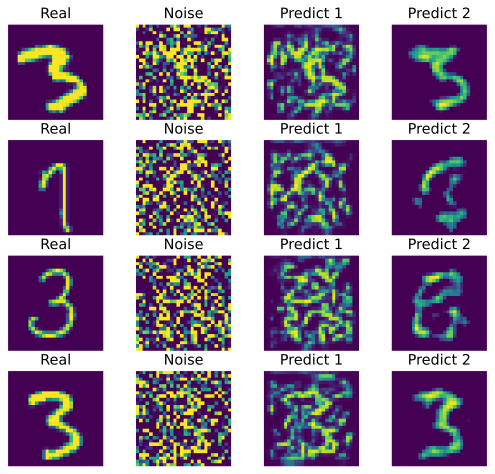

In [15]:
pred = model.predict(x_test_noisy)
pred1 = model1.predict(x_test_noisy)

cols = 4
rows = 4
num = cols * rows

fig = plt.figure(figsize=(8,3))
for i in range(num//cols):
    img_num = np.random.randint(x_test_noisy.shape[0])
    im_r = x_test_f[img_num,::]
    im_n = x_test_noisy[img_num,::]
    im_p = pred[img_num,::]
    im_p1 = pred1[img_num,::]

    ax = fig.add_subplot(rows, cols, 1 + cols*i, xticks=[], yticks=[])
    plt.imshow(im_r)
    ax.set_title("Real")
    ax = fig.add_subplot(rows, cols, 2 + cols*i, xticks=[], yticks=[])
    plt.imshow(im_n)
    ax.set_title("Noise")
    ax = fig.add_subplot(rows, cols, 3 + cols*i, xticks=[], yticks=[])
    plt.imshow(im_p)
    ax.set_title("Predict 1")
    ax = fig.add_subplot(rows, cols, 4 + cols*i, xticks=[], yticks=[])
    plt.imshow(im_p1)
    ax.set_title("Predict 2")


fig.set_size_inches(2.2 * cols, 2 * rows)
plt.autoscale()
plt.show()